In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4256,8207-VVMYB,Female,0,Yes,No,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),26.00,2006.95,No
6721,6898-RBTLU,Female,0,Yes,Yes,49,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),79.30,3902.45,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
689,5076-YVXCM,Male,0,No,No,51,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),83.40,4149.45,No
5402,5057-RKGLH,Female,0,Yes,Yes,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,191.1,No


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df = df.drop(columns='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columnsToEncode = ['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MultipleLines','InternetService','Contract','PaymentMethod','Churn']
for column in columnsToEncode:
    df[column] = le.fit_transform(df[column])

df = df[df.TotalCharges!=' ']
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [6]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [7]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure              float64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [8]:
df.shape

(7032, 20)

In [9]:
X = df.drop('Churn',axis='columns')
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(3000, activation='leaky_relu'),
    keras.layers.Dense(300, activation='leaky_relu'),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)



Epoch 1/50


165/165 [==============================] - 2s 7ms/step - loss: 0.4445 - accuracy: 0.7857
Epoch 2/50
165/165 [==============================] - 1s 6ms/step - loss: 0.4293 - accuracy: 0.7964
Epoch 3/50
165/165 [==============================] - 1s 6ms/step - loss: 0.4208 - accuracy: 0.8083
Epoch 4/50
165/165 [==============================] - 1s 7ms/step - loss: 0.4163 - accuracy: 0.8058
Epoch 5/50
165/165 [==============================] - 1s 7ms/step - loss: 0.4151 - accuracy: 0.8062
Epoch 6/50
165/165 [==============================] - 1s 7ms/step - loss: 0.4103 - accuracy: 0.8094
Epoch 7/50
165/165 [==============================] - 1s 8ms/step - loss: 0.4074 - accuracy: 0.8130
Epoch 8/50
165/165 [==============================] - 1s 8ms/step - loss: 0.4083 - accuracy: 0.8096
Epoch 9/50
165/165 [==============================] - 1s 8ms/step - loss: 0.4061 - accuracy: 0.8115
Epoch 10/50
165/165 [==============================] - 1s 7ms/step - loss: 0.4031 - accuracy: 0.

In [11]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 1s 6ms/step - loss: 0.8145 - accuracy: 0.7668


[0.8144802451133728, 0.766780436038971]

55/55 [==============================] - 1s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

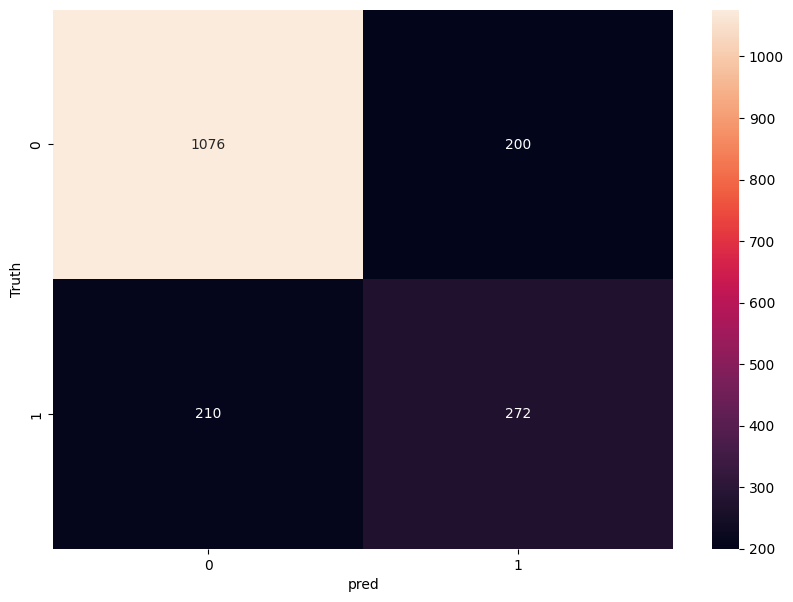

In [12]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [13]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.23321956769055746
Mean Absolute Error: 0.23321956769055746
R-squared: -0.171939021059067
Accuracy Score: 0.7667804323094426
Confusion Matrix : 
[[1076  200]
 [ 210  272]]
Full report : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1276
           1       0.58      0.56      0.57       482

    accuracy                           0.77      1758
   macro avg       0.71      0.70      0.71      1758
weighted avg       0.77      0.77      0.77      1758

